In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/Breast_Cancer.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

In [3]:
def load_data(path: str) -> pd.DataFrame:
    return pd.read_csv(path)

# Data Description

**Race:** 0 = represent white Race , 1 = represent Black Race and 2 = Represent Other Race .

**Marital Status:** 0 = Married, 1 = Divorced , 2= Single, 3 = Widowed and 4 = Separated

**T Stage:** The T refers to the size and extent of the main tumor. The main tumor is usually called the primary tumor.T1, T2, T3, T4: Refers to the size and/or extent of the main tumor. The higher the number after the T, the larger the tumor or the more it has grown into nearby tissues. T-T0: No evidence of primary tumor. T1 (includes T1a, T1b, and T1c): Tumor is 2 cm (3/4 of an inch) or less across. T2: Tumor is more than 2 cm but not more than 5 cm (2 inches) across. T3: Tumor is more than 5 cm across

**N Stage:** The main tumor is usually called the primary tumor. The N refers to the the number of nearby lymph nodes that have cancer. The M refers to whether the cancer has metastasized. This means that the cancer has spread from the primary tumor to other parts of the body.N1, N2, N3: Refers to the number and location of lymph nodes that contain cancer. The higher the number after the N, the more lymph nodes that contain cancer.

**6th Stage:** 0 = IIA , 1= IIIA, 2 = IIIC , 3=IIB  and  4 = IIIB
Stage groups for breast cancer,Doctors assign the stage of the cancer by combining the T, N, and M classifications (see above), the tumor grade, and the results of ER/PR and HER2 testing. This information is used to help determine your prognosis (see Diagnosis).Most patients are anxious to learn the exact stage of the cancer. If you have surgery as the first treatment for your cancer, your doctor will generally confirm the stage of the cancer when the testing after surgery is finalized, usually about 5 to 7 days after surgery. When systemic treatment is given before surgery, which is typically with medications and is called neoadjuvant therapy, the stage of the cancer is primarily determined clinically. Doctors may refer to stage I to stage IIA cancer as "early stage" and stage IIB to stage III as "locally advanced." 

**Stage IIA** Any 1 of these conditions:
1. There is no evidence of a tumor in the breast, but the cancer has spread to 1 to 3 axillary lymph nodes. It has not spread to distant parts of the body (T0, N1, M0).

2. The tumor is 20 mm or smaller and has spread to 1 to 3 axillary lymph nodes (T1, N1, M0).
 
3. The tumor is larger than 20 mm but not larger than 50 mm and has not spread to the axillary lymph nodes (T2, N0, M0).

**Stage IIB** Either of these conditions:
1. The tumor is larger than 20 mm but not larger than 50 mm and has spread to 1 to 3 axillary lymph nodes (T2, N1, M0).

2. The tumor is larger than 50 mm but has not spread to the axillary lymph nodes (T3, N0, M0).

**Stage IIIA** The tumor of any size has spread to 4 to 9 axillary lymph nodes or to internal mammary lymph nodes. It has not spread to other parts of the body (T0, T1, T2, or T3; N2; M0). Stage IIIA may also be a tumor larger than 50 mm that has spread to 1 to 3 axillary lymph nodes (T3, N1, M0).

**Stage IIIB** The tumor has spread to the chest wall or caused swelling or ulceration of the breast, or it is diagnosed as inflammatory breast cancer. It may or may not have spread to up to 9 axillary or internal mammary lymph nodes. It has not spread to other parts of the body (T4; N0, N1, or N2; M0). 

**Stage IIIC** A tumor of any size that has spread to 10 or more axillary lymph nodes, the internal mammary lymph nodes, and/or the lymph nodes under the collarbone. It has not spread to other parts of the body (any T, N3, M0).

**differentiate** 0 =Poorly differentiated, 1 = Moderately differentiated, 2= Well differentiated and 3 = Undifferentiated


**Grade:**

1. What does cancer grade mean?

Breast cancers are given a grade according to:

1.1 How different the cancer cells are to normal breast cells 
1.2 How quickly they are growing

The grade of a cancer is different to the cancer stage. A cancer’s grade is determined when a doctor (pathologist) looks at the cancer cells under a microscope, using tissue from a biopsy or after breast cancer surgery.

2. What are the different grades of breast cancer?

There are three grades of invasive breast cancer:

Grade 1 looks most like normal breast cells and is usually slow growing 
Grade 2 looks less like normal cells and is growing faster 
Grade 3 looks different to normal breast cells and is usually fast growing

Or we can say that a low grade number (grade 1) usually means the cancer is slower-growing and less likely to spread. A high grade number (grade 3) means a faster-growing cancer that's more likely to spread. An intermediate grade number (grade 2) means the cancer is growing faster than a grade 1 cancer but slower than a grade 3 cancer.

Sometimes the grade given to a cancer after a biopsy can change after surgery. This is because after surgery there’s more tissue for the pathologist to look at, which can give them more detailed information about the cancer.


**A Stage:** 0 =Regional and 1 = Distant

 This parameters shows Stages of Cancer and is a summary of all data , it is an attribute that involves T,N and Grade data.

1. Regional: The cancer has spread outside the breast to nearby structures or lymph nodes. 

2. Distant: The cancer has spread to distant parts of the body such as the lungs, liver or bones.

**Estrogen Status:** 0 =Estrogen positive and 1 = Estrogen negative

1. Estrogen positive : - Cancer cells that are ER positive may need estrogen to grow. These cells may stop growing or die when treated with substances that block the binding and actions of estrogen. Also called estrogen receptor positive.
2. Estrogen negative : - negative breast cancers are a group of tumors with poor prognosis and fewer cancer prevention and treatment strategies compared to ER-positive tumors.


**Progesterone Status:** 0 = Progesterone positive and 1 = Progesterone negative

1. Progesterone positive:- This type of breast cancer is sensitive to progesterone, and the cells have receptors that allow them to use this hormone to grow. Treatment with endocrine therapy blocks the growth of the cancer cells.

2. Progesterone negative: - This type of breast cancers have no estrogen or progesterone receptors. Treatment with hormone therapy drugs is not helpful for these cancers. These cancers tend to grow faster than hormone receptor-positive cancers.

**Status:** 0 = Alive and 1 = dead


Hormone receptor-negative (or hormone-negative): -  breast cancers have no estrogen or progesterone receptors. Treatment with hormone therapy drugs is not helpful for these cancers. These cancers tend to grow faster than hormone receptor-positive cancers. If they come back after treatment, it’s often in the first few years



In [4]:
cancer_data = load_data(path = "/kaggle/input/breast-cancer/Breast_Cancer.csv")
cancer_data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Get all column names

In [5]:
cancer_data.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

<AxesSubplot:>

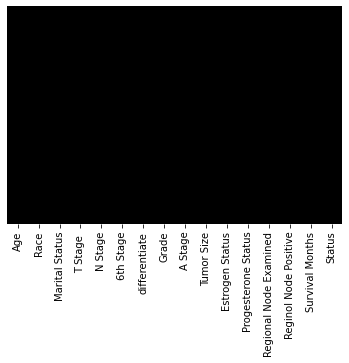

In [6]:
sns.heatmap(cancer_data.isnull(), yticklabels=False, cbar=False, cmap='cubehelix')

## Exploratory data analysis

In [7]:
report = ProfileReport(cancer_data, title="Cancer data pandas profile report")
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Survival rate

In [8]:
num_patients: int = cancer_data.shape[0]
number_of_survivors: int = cancer_data["Status"].value_counts()["Alive"]

print(f"Of {num_patients} patients, {100 * (number_of_survivors / num_patients) :.3f}% survived")

Of 4024 patients, 84.692% survived


# How does Race and Marriage affect Survival?

In [9]:
num_white_people = cancer_data["Race"].value_counts()["White"]
num_black_people = cancer_data["Race"].value_counts()["Black"]
num_other_people = cancer_data["Race"].value_counts()["Other"]

white_survivors = cancer_data.loc[cancer_data["Status"] == "Alive"][cancer_data["Race"] == "White"]
black_survivors = cancer_data.loc[cancer_data["Status"] == "Alive"][cancer_data["Race"] == "Black"]
other_survivors = cancer_data.loc[cancer_data["Status"] == "Alive"][cancer_data["Race"] == "Other"]

num_white_survivors = white_survivors["Status"].value_counts()["Alive"]
num_black_survivors = black_survivors["Status"].value_counts()["Alive"]
num_other_survivors = other_survivors["Status"].value_counts()["Alive"]

print(f"Whites: Total: {num_white_people} - Survived: {num_white_survivors} - Percentage: {100 * (num_white_survivors / num_white_people) :.3f}%")
print(f"Blacks: Total: {num_black_people} - Survived: {num_black_survivors} - Percentage: {100 * (num_black_survivors / num_black_people) :.3f}%")
print(f"Others: Total: {num_other_people} - Survived: {num_other_survivors} - Percentage: {100 * (num_other_survivors / num_other_people) :.3f}%")

Whites: Total: 3413 - Survived: 2903 - Percentage: 85.057%
Blacks: Total: 291 - Survived: 218 - Percentage: 74.914%
Others: Total: 320 - Survived: 287 - Percentage: 89.688%


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<AxesSubplot:xlabel='Race', ylabel='count'>

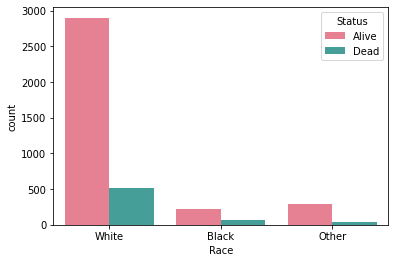

In [10]:
sns.countplot(data = cancer_data, x="Race", hue="Status", palette="husl")

In [11]:
stats = {}

for _, status in enumerate(list(cancer_data["Marital Status"].unique())):
    num_current_status = cancer_data["Marital Status"].value_counts()[status]
    status_survivors = cancer_data.loc[cancer_data["Status"] == "Alive"][cancer_data["Marital Status"] == status]
    num_survivors_status = status_survivors["Status"].value_counts()["Alive"]
    
    stats[status] = {"survivors": num_current_status, "num_people": num_survivors_status, "age": status_survivors["Age"].median()}

for key, value in stats.items():
    print(f"Total Number of {key} people: { value['survivors'] } have median age: {value['age'] :.3f}")
    print(f"{key}: Percentage survival - {100 * (value['num_people'] / value['survivors']) :.3f}%")
    print("=======================================================================================\n")

Total Number of Married people: 2643 have median age: 53.000
Married: Percentage survival - 86.455%

Total Number of Divorced people: 486 have median age: 56.000
Divorced: Percentage survival - 81.481%

Total Number of Single  people: 615 have median age: 51.000
Single : Percentage survival - 83.089%

Total Number of Widowed people: 235 have median age: 63.000
Widowed: Percentage survival - 79.149%

Total Number of Separated people: 45 have median age: 54.000
Separated: Percentage survival - 66.667%



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


<AxesSubplot:xlabel='Marital Status', ylabel='count'>

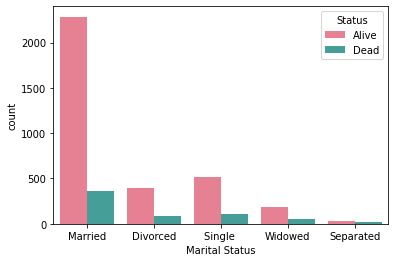

In [12]:
sns.countplot(data = cancer_data, x="Marital Status", hue="Status", palette="husl")

In [13]:
import itertools

marital_status = list(cancer_data["Marital Status"].unique())
race = list(cancer_data["Race"].unique())

for _, status in enumerate(itertools.product(marital_status, race)):
    current_df = cancer_data.loc[cancer_data["Marital Status"] == status[0]][cancer_data["Race"] == status[1]]
    num_patients: int = int(current_df["Marital Status"].value_counts())
    num_survivors: int = int(current_df["Status"].value_counts()["Alive"])
    
    
    print(f"Race: {status[1]} - Marital status: {status[0]}")
    print(f"Number of patients: {num_patients} with median age: {current_df['Age'].median() :.3f}")
    if num_survivors:
        print(f"Percentage survival: {100 * (num_survivors / num_patients) :.3f}%")
    else:
         print(f"Percentage survival: 0%")
    
    print("================================================================================================\n")


Race: White - Marital status: Married
Number of patients: 2293 with median age: 54.000
Percentage survival: 86.001%

Race: Black - Marital status: Married
Number of patients: 113 with median age: 53.000
Percentage survival: 83.186%

Race: Other - Marital status: Married
Number of patients: 237 with median age: 50.000
Percentage survival: 92.405%

Race: White - Marital status: Divorced
Number of patients: 417 with median age: 56.000
Percentage survival: 81.295%

Race: Black - Marital status: Divorced
Number of patients: 40 with median age: 55.000
Percentage survival: 77.500%

Race: Other - Marital status: Divorced
Number of patients: 29 with median age: 54.000
Percentage survival: 89.655%

Race: White - Marital status: Single 
Number of patients: 480 with median age: 52.000
Percentage survival: 86.250%

Race: Black - Marital status: Single 
Number of patients: 102 with median age: 49.000
Percentage survival: 68.627%

Race: Other - Marital status: Single 
Number of patients: 33 with medi

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boole

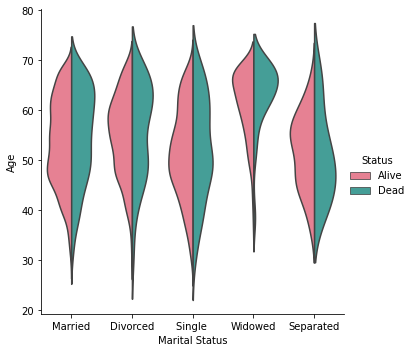

In [14]:
sns.catplot(data=cancer_data, x="Marital Status", y="Age", kind="violin", color=".9", inner=None, hue="Status", split=True, palette="husl")
# sns.swarmplot(data=cancer_data, x="Marital Status", y="Age", size=3)

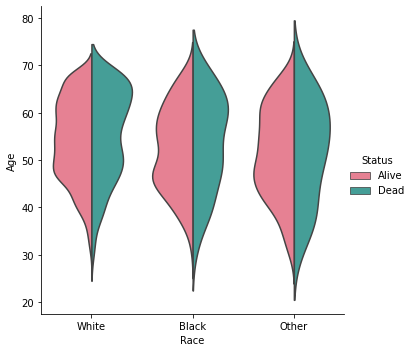

In [15]:
sns.catplot(data=cancer_data, x="Race", y="Age", kind="violin", color=".9", inner=None, hue="Status", split=True, palette="husl")

### Insights

1. In general black women are more likely to not survive when diagnosed with cancer.
    This might be due to the lack of doctors within black communities, hence no readily available healthcare
    and when they are diagnosed, it is already too late.
2. Separated and Widowed women are the most affected by a cancer diagnostic, while married and divorced women are more likely to survive.
    Married and divorced women have built a support system, either with their husbands, kids,
    familly friends and extended familly, which might be lost with seperated and widowed women
    (generally spend a long time grieving, and with age can make the willingness to receive treatment decrease,
    as this is also a mental process)
3. Some groups have very small sample sizes, hence additional data might be needed to attain a conclusive answer.
3. None the less, it can be concluded that a support system and access to healthcare readily
    would help women as they battle cancer.

# T, N, 6th and A Stages are all related and somehow play a role in the survival rate of a patient.

In [16]:
t_stage = list(cancer_data["T Stage "].unique())
n_stage = list(cancer_data["N Stage"].unique())
sixth_stage = list(cancer_data["6th Stage"].unique())
a_stage = list(cancer_data["A Stage"].unique())

stages = itertools.product(t_stage, n_stage, sixth_stage, a_stage)
for stage in stages:
    current_df = cancer_data.loc[cancer_data["T Stage "] == stage[0]][cancer_data["N Stage"] == stage[1]][cancer_data["6th Stage"] == stage[2]][cancer_data["A Stage"] == stage[3]]
    num_patients: int = current_df.shape[0]
    if not current_df.empty:
        num_survivors: int = current_df["Status"].value_counts()["Alive"]
        print(f"{num_patients} patients with Stage T: {stage[0]} | Stage N: {stage[1]} | Stage 6th: {stage[2]} | A stage: {stage[3]}")
        print(f"Percentage survival: {100 * (num_survivors / num_patients) :.3f}%")
        print("================================================================================================================================\n")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1305 patients with Stage T: T1 | Stage N: N1 | Stage 6th: IIA | A stage: Regional
Percentage survival: 92.644%

211 patients with Stage T: T1 | Stage N: N2 | Stage 6th: IIIA | A stage: Regional
Percentage survival: 85.308%

78 patients with Stage T: T1 | Stage N: N3 | Stage 6th: IIIC | A stage: Regional
Percentage survival: 64.103%

9 patients with Stage T: T1 | Stage N: N3 | Stage 6th: IIIC | A stage: Distant
Percentage survival: 77.778%

1130 patients with Stage T: T2 | Stage N: N1 | Stage 6th: IIB | A stage: Regional
Percentage survival: 88.053%

428 patients with Stage T: T2 | Stage N: N2 | Stage 6th: IIIA | A stage: Regional
Percentage survival: 79.439%

198 patients with Stage T: T2 | Stage N: N3 | Stage 6th: IIIC | A stage: Regional
Percentage survival: 65.657%

30 patients with Stage T: T2 | Stage N: N3 | Stage 6th: IIIC | A stage: Distant
Percentage survival: 60.000%

262 patients with Stage T: T3 | Stage N: N1 | Stage 6th: IIIA | A stage: Regional
Percentage survival: 88.168%

### Insights
1. The more the cancer spreads (Distant), the less likely the survival rate
2. As you move from II* to III*, the changes of survival also reduce
3. Stage Tx and Stage Nx increase, so does the 6th Stage and A Stage become affected.
    This means as they increase, the chances of survival decrease.
4. The stage least likely to be treated is T4, N3, IIC and Distant,
    while T1, N1 and IIA and Regional is more likely to be treated

# Differentiation and Grade are related. How do these affect survival rate?

In [17]:
differentiation = list(cancer_data["differentiate"].unique())
grades = list(cancer_data["Grade"].unique())

for _, stage in enumerate(itertools.product(differentiation, grades)):
    current_df = cancer_data.loc[cancer_data["differentiate"] == stage[0]][cancer_data["Grade"] == stage[1]]
    if not current_df.empty:
        num_patients: int = current_df.shape[0]
        num_survivors: int = current_df["Status"].value_counts()["Alive"]
            
        print(f"{num_patients} patients with Differentiation Stage: {stage[0]} | Grade: {stage[1]}")
        print(f"Percentage survival: {100 * (num_survivors / num_patients) :.3f}%")
        print("================================================================================================================================\n")

1111 patients with Differentiation Stage: Poorly differentiated | Grade: 3
Percentage survival: 76.328%

2351 patients with Differentiation Stage: Moderately differentiated | Grade: 2
Percentage survival: 87.027%

543 patients with Differentiation Stage: Well differentiated | Grade: 1
Percentage survival: 92.818%

19 patients with Differentiation Stage: Undifferentiated | Grade:  anaplastic; Grade IV
Percentage survival: 52.632%



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


### Insights
1. Anaplastic cancers show very aggressive growth, hence the lowest survival rate even 
    though they might show no differentiation as observed in the dataset.
2. As the grade of the cells increase, the less likely it is to cure the cancer
    even if the cells are not differentiated.
3. Best case would be undifferentiated and grade I, while anaplastic and grade IV would be the worst

# Estrogen and Progesterone are two related female hormones, that intereact together. How do they affect the survival rate?

In [18]:
progesterone = list(cancer_data["Progesterone Status"].unique())
oestrogen = list(cancer_data["Estrogen Status"].unique())

for _, status in enumerate(itertools.product(progesterone, oestrogen)):
    current_df = cancer_data.loc[cancer_data["Progesterone Status"] == status[0]][cancer_data["Estrogen Status"] == status[1]]
    if not current_df.empty:
        num_patients = current_df.shape[0]
        num_survivors: int = current_df["Status"].value_counts()["Alive"]
        
        progesterone_status = "Positive" if status[0] == 1 else "Negative"
        oestrogen_status = "Positive" if status[1] == 1 else "Negative"
        
        print(f"{num_patients} patients with  {status[0]} Progesterone and {status[1]} Oestrogen")
        print(f"Percentage survival: {100 * (num_survivors / num_patients) :.3f}%")
        print("================================================================================================================================\n")

3299 patients with  Positive Progesterone and Positive Oestrogen
Percentage survival: 87.693%

27 patients with  Positive Progesterone and Negative Oestrogen
Percentage survival: 77.778%

456 patients with  Negative Progesterone and Positive Oestrogen
Percentage survival: 77.632%

242 patients with  Negative Progesterone and Negative Oestrogen
Percentage survival: 57.851%



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


### Insights
1. Progesterone and Estrogen are female hormones involved in the development of secondary sexual characteristics
2. This means a tumor positive for both, would be difficult to treat as those receptors cannot be targetted for treatment.
    This is because the cells are not sensitive to treatment using the hormones i.e. no response
3. From the results obtained, Tumors negative for for both Progesteron and Estrogen had a low survival rate,
    those positive for both had high survival rate. Tumors positive for both responded to both treatment to a lesser
    extent than those positive for both, but more than those negative for both hormones.

# How does Tumor size affect survival rate?

In [19]:
cancer_data["Tumor Size"].describe()

count    4024.000000
mean       30.473658
std        21.119696
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor Size, dtype: float64

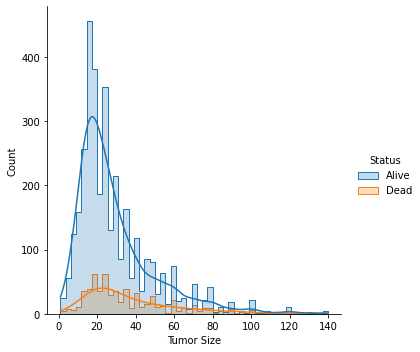

In [20]:
sns.displot(cancer_data, x="Tumor Size", hue="Status", element="step", kde=True)

In [21]:
survived_cancer_data = cancer_data.loc[cancer_data["Status"] == "Alive"]["Tumor Size"]
dead_cancer_data = cancer_data.loc[cancer_data["Status"] == "Dead"]["Tumor Size"]

print(f"Patients who survived had tumor sizes of {survived_cancer_data.mean() :.3f} +/- {survived_cancer_data.std() :.3f} and median: {survived_cancer_data.median() :.3f}")
print(f"Patients who died had tumor sizes of {dead_cancer_data.mean() :.3f} +/- {dead_cancer_data.std() :.3f} and median: {dead_cancer_data.median() :.3f}")

Patients who survived had tumor sizes of 29.269 +/- 20.303 and median: 23.000
Patients who died had tumor sizes of 37.140 +/- 24.116 and median: 30.000


In [22]:
from scipy.stats import ttest_ind

results = ttest_ind(survived_cancer_data, dead_cancer_data)

if results.pvalue < 0.001:
    print(f"{results.pvalue}: Results were highly significant ***")
elif results.pvalue < 0.01:
    print(f"{results.pvalue}: Results were moderately significant **")
elif results.pvalue < 0.05:
    print(f"{results.pvalue}: Results were significant *")

1.2377493765575498e-17: Results were highly significant ***


### Insights
1. We obtained highly significant results between tumor sizes between survived and dead patients
2. This suggests that patients with large tumor sizes were more likely not to survived than those with smaller tumors.

# The number of Regional Positive Nodes identified after a Regional Node Examination, the ratio of examined nodes would have an effect on survival.

In [23]:
cancer_sample = cancer_data[["Regional Node Examined", "Reginol Node Positive", "Status"]]
cancer_sample["Percentage Positive Nodes"] = 100 * (cancer_sample["Reginol Node Positive"] / cancer_sample["Regional Node Examined"])

cancer_sample.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Regional Node Examined,Reginol Node Positive,Percentage Positive Nodes
count,4024.000000,4024.000000,4024.000000
mean,14.357107,4.158052,32.646772
std,8.099675,5.109331,28.702183
min,1.000000,1.000000,2.040816
25%,9.000000,1.000000,10.344828
50%,14.000000,2.000000,21.428571
75%,19.000000,5.000000,50.000000
max,61.000000,46.000000,100.000000


In [24]:
nodes_survived = cancer_sample.loc[cancer_sample["Status"] == "Alive"]["Percentage Positive Nodes"]
nodes_dead = cancer_sample.loc[cancer_sample["Status"] == "Dead"]["Percentage Positive Nodes"]

print(f"Patients who survived had {nodes_survived.mean() :.3f}% +/- {nodes_survived.std() :.3f} positive nodes with median: {nodes_survived.median() :.3f}%")
print(f"Patients who died had {nodes_dead.mean() :.3f}% +/- {nodes_dead.std() :.3f} positve nodes with median: {nodes_dead.median() :.3f}%")

Patients who survived had 29.721% +/- 26.850 positive nodes with median: 20.000%
Patients who died had 48.836% +/- 32.945 positve nodes with median: 42.857%


In [25]:
results = ttest_ind(nodes_survived, nodes_dead)

if results.pvalue < 0.001:
    print(f"{results.pvalue}: Results were highly significant ***")
elif results.pvalue < 0.01:
    print(f"{results.pvalue}: Results were moderately significant **")
elif results.pvalue < 0.05:
    print(f"{results.pvalue}: Results were significant *")

9.579385418423028e-54: Results were highly significant ***


### Insights
1. The higher the percentage of positive nodes identified after a biopsy, the less likely the patients survived.
    The results were shown to be highly significant.